# Football players tracking with YOLOv5 + ByteTrack

## About

In this tutorial, we will utilize an open source computer vision dataset from one of the 100,000+ available on [Roboflow Universe](https://universe.roboflow.com/).

If you already have your own images (and, optionally, annotations), you can convert your dataset using Roboflow, a set of tools developers use to build better computer vision models quickly and accurately. 150k+ developers use roboflow for (automatic) annotation, converting dataset formats (like to YOLOv5), training, deploying, and improving their datasets/models.

**Usefull links:**

- [YOLOv5 repository](https://github.com/ultralytics/yolov5)
- [ByteTrack repository](https://github.com/ifzhang/ByteTrack)
- [Roboflow Notebooks](https://github.com/roboflow-ai/notebooks)

## Table of content:
* [Setup](#setup)
* [Download data](#download-data)
* [Install YOLOv5](#install-yolov5)



## Setup <a class="anchor" id="setup"></a>

In [ ]:
!nvidia-smi

Sat Mar 23 15:34:25 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = Users/sakshambehal/Documents/Research_Papers/Playertracking
print(HOME)

Users/sakshambehal/Documents/Research_Papers/Playertracking


## Download data <a class="anchor" id="download-data"></a>

In [ ]:
!pip install kaggle --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 886.0 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


We will use [DFL - Bundesliga Data Shootout](https://www.kaggle.com/competitions/dfl-bundesliga-data-shootout/data) from Kaggle. We can download it using [Kaggle API](https://github.com/Kaggle/kaggle-api). According to documentation we need to set up two environment variables first:

```
export KAGGLE_USERNAME=datadinosaur
export KAGGLE_KEY=xxxxxxxxxxxxxx
```

In [ ]:
import os
from getpass import getpass

In [ ]:
os.environ['KAGGLE_USERNAME'] = getpass('Enter KAGGLE_USERNAME secret value: ')
os.environ['KAGGLE_KEY'] = getpass('Enter KAGGLE_KEY secret value: ')

Enter KAGGLE_USERNAME secret value: ··········
Enter KAGGLE_KEY secret value: ··········


In [ ]:
!kaggle competitions files -c dfl-bundesliga-data-shootout | grep clips | head -10

clips/08fd33_2.mp4      21MB  2022-07-29 14:23:09  
clips/08fd33_9.mp4      18MB  2022-07-29 14:23:09  
clips/0a2d9b_9.mp4      18MB  2022-07-29 14:23:09  
clips/08fd33_3.mp4      17MB  2022-07-29 14:23:09  
clips/08fd33_6.mp4      19MB  2022-07-29 14:23:09  
clips/08fd33_0.mp4      19MB  2022-07-29 14:23:09  
clips/0a2d9b_5.mp4      18MB  2022-07-29 14:23:09  
clips/08fd33_7.mp4      18MB  2022-07-29 14:23:09  
clips/0a2d9b_0.mp4      20MB  2022-07-29 14:23:09  
clips/0a2d9b_7.mp4      19MB  2022-07-29 14:23:09  


In [ ]:
!cd Users/sakshambehal/Documents/Research_Papers/Playertracking
!kaggle competitions files -c dfl-bundesliga-data-shootout | \
grep clips | head -20 | \
awk '{print $1}' | \
while read -r line; \
  do kaggle competitions download -c dfl-bundesliga-data-shootout -f $line -p clips --quiet; \
  unzip ${line}.zip -d clips && rm ${line}.zip; \
  done

/bin/bash: line 1: cd: Users/sakshambehal/Documents/Research_Papers/Playertracking: No such file or directory
Archive:  clips/08fd33_2.mp4.zip
replace clips/08fd33_2.mp4? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [clips/08f]
replace clips/08fd33_2.mp4? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [d33_9.mp4]
replace clips/08fd33_2.mp4? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [{ENTER}]
replace clips/08fd33_2.mp4? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [clips/0a2]
replace clips/08fd33_2.mp4? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [d9b_9.mp4]
replace clips/08fd33_2.mp4? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [{ENTER}]
replace clips/08fd33_2.mp4? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [clips/08f]
replace clips/08fd33_2.mp4? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [d33_3.mp4]
replace clips/08fd33_2.mp4? [y]es, [n

## Install YOLOv5 <a class="anchor" id="install-yolov5"></a>

In [ ]:
%cd {HOME}
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt

import torch
import utils
display = utils.notebook_init()

YOLOv5 🚀 v7.0-294-gdb125a20 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.3/78.2 GB disk)


### Use pre-trained COCO model - full video

In [ ]:
%cd {HOME}/yolov5
!python detect.py --weights yolov5x.pt --img 640 --conf 0.25 --source {HOME}/clips/08fd33_4.mp4 --name coco

[Errno 2] No such file or directory: 'Users/sakshambehal/Documents/Research_Papers/Playertracking/yolov5'
/content/yolov5
detect: weights=['yolov5x.pt'], source=Users/sakshambehal/Documents/Research_Papers/Playertracking/clips/08fd33_4.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=coco, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-294-gdb125a20 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

100% 166M/166M [00:01<00:00, 173MB/s]

Fusing layers... 
YOLOv5x summary: 444 layers, 86705005 parameters, 0 gradients, 205.5 GFLOPs
Traceback (most recent call last):
  File "/content/yolov5/detect.py", line 312, in <module>
    main(opt)
  File "/content/

In [ ]:
# %cd {HOME}/yolov5
# !python detect.py --weights yolov5x6.pt --img 1280 --conf 0.25 --source {HOME}/clips/08fd33_4.mp4 --name coco

### Use custom model - full video

This model was traind using [football-players-detection](https://app.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/overview) dataset.

In [ ]:
%cd {HOME}
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1OYwrlRti4cieuvVr8ERaJhTQdFJXWT4I' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1OYwrlRti4cieuvVr8ERaJhTQdFJXWT4I" -O best.pt && rm -rf /tmp/cookies.txt

[Errno 2] No such file or directory: 'Users/sakshambehal/Documents/Research_Papers/Playertracking'
/content/yolov5
--2024-03-23 16:07:58--  https://docs.google.com/uc?export=download&confirm=&id=1OYwrlRti4cieuvVr8ERaJhTQdFJXWT4I
Resolving docs.google.com (docs.google.com)... 142.251.2.100, 142.251.2.113, 142.251.2.101, ...
Connecting to docs.google.com (docs.google.com)|142.251.2.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1OYwrlRti4cieuvVr8ERaJhTQdFJXWT4I&export=download [following]
--2024-03-23 16:07:58--  https://drive.usercontent.google.com/download?id=1OYwrlRti4cieuvVr8ERaJhTQdFJXWT4I&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.101.132, 2607:f8b0:4023:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.101.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2419 (2.4K) [text/

In [ ]:
WEIGHTS_PATH = f"{HOME}/best.pt"

In [ ]:
%cd {HOME}/yolov5
!python detect.py --weights {HOME}/best.pt --img 1280 --conf 0.25 --source {HOME}/clips/08fd33_4.mp4 --name custom

[Errno 2] No such file or directory: 'Users/sakshambehal/Documents/Research_Papers/Playertracking/yolov5'
/content/yolov5
detect: weights=['Users/sakshambehal/Documents/Research_Papers/Playertracking/best.pt'], source=Users/sakshambehal/Documents/Research_Papers/Playertracking/clips/08fd33_4.mp4, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=custom, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-294-gdb125a20 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Traceback (most recent call last):
  File "/content/yolov5/detect.py", line 312, in <module>
    main(opt)
  File "/content/yolov5/detect.py", line 307, in main
    run(**vars(opt))
  File "/usr/l

### Use custom model - single frame

In [ ]:
from typing import Generator

import matplotlib.pyplot as plt
import numpy as np

import cv2

%matplotlib inline


def generate_frames(video_file: str) -> Generator[np.ndarray, None, None]:
    video = cv2.VideoCapture(video_file)

    while video.isOpened():
        success, frame = video.read()

        if not success:
            break

        yield frame

    video.release()


def plot_image(image: np.ndarray, size: int = 12) -> None:
    plt.figure(figsize=(size, size))
    plt.imshow(image[...,::-1])
    plt.show()

In [ ]:
SOURCE_VIDEO_PATH = f"{HOME}/clips/08fd33_4.mp4"

In [ ]:
frame_iterator = iter(generate_frames(video_file=SOURCE_VIDEO_PATH))

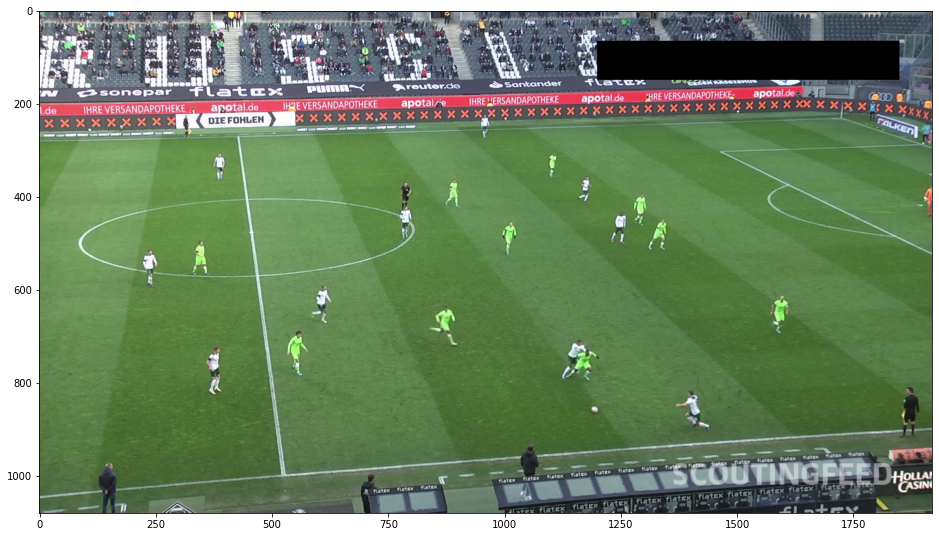

In [ ]:
frame = next(frame_iterator)
plot_image(frame, 16)

In [ ]:
import torch

model = torch.hub.load('ultralytics/yolov5', 'custom', WEIGHTS_PATH, device=0)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 v7.0-27-g454dae1 Python-3.8.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 416 layers, 139999708 parameters, 0 gradients, 207.9 GFLOPs
Adding AutoShape... 


In [ ]:
results = model(frame, size=1280)

In [ ]:
results.pandas()

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 1080x1920 1 ball, 1 goalkeeper, 19 players, 3 referees
Speed: 12.8ms pre-process, 194.0ms inference, 5.0ms NMS per image at shape (1, 3, 768, 1280)

In [ ]:
results.pred[0]

tensor([[5.33234e+02, 6.87570e+02, 5.78573e+02, 7.84712e+02, 9.73769e-01, 2.00000e+00],
        [3.27560e+02, 4.94221e+02, 3.67715e+02, 5.70054e+02, 9.72061e-01, 2.00000e+00],
        [1.36868e+03, 8.16015e+02, 1.44455e+03, 9.04930e+02, 9.71974e-01, 2.00000e+00],
        [1.30964e+03, 4.47144e+02, 1.35070e+03, 5.16344e+02, 9.67860e-01, 2.00000e+00],
        [1.85383e+03, 8.07013e+02, 1.89357e+03, 9.18096e+02, 9.66307e-01, 3.00000e+00],
        [8.47532e+02, 6.34075e+02, 9.00840e+02, 7.21330e+02, 9.66143e-01, 2.00000e+00],
        [2.21989e+02, 5.13461e+02, 2.55608e+02, 5.94411e+02, 9.64198e-01, 2.00000e+00],
        [1.12392e+03, 7.07760e+02, 1.18086e+03, 7.92754e+02, 9.63277e-01, 2.00000e+00],
        [9.96095e+02, 4.54108e+02, 1.02639e+03, 5.26345e+02, 9.62843e-01, 2.00000e+00],
        [1.57265e+03, 6.11327e+02, 1.61230e+03, 6.94755e+02, 9.62607e-01, 2.00000e+00],
        [1.22946e+03, 4.31551e+02, 1.26351e+03, 5.01717e+02, 9.62112e-01, 2.00000e+00],
        [8.73488e+02, 3.61339e+0

In [ ]:
model.names

{0: 'ball', 1: 'goalkeeper', 2: 'player', 3: 'referee'}